In [1]:
import sys
import importlib
import os
import matplotlib.pyplot as plt
import pandas as pd
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from src.dataLoaders.PatientDataLoader import PatientDataProcessor
importlib.reload(sys.modules['src.dataLoaders.PatientDataLoader'])

<module 'src.dataLoaders.PatientDataLoader' from 'c:\\Datalogi\\Bachelor\\XAI-in-Medical-Image-Analysis\\src\\dataLoaders\\PatientDataLoader.py'>

In [6]:
meta_folder = 'OAIData21/'
data_path = '../datasets/meta_data/' + meta_folder

processor = PatientDataProcessor(base_path=data_path)
# processor.create_meta_data_for_visit(visit_no=visit)
processor.load_all_visits()
data = processor.get_data()
# processor.get_data()["V11WOMKPL"].unique()

data = processor.get_all_clinical_data()

Loading kMRI data for visit V00
object
Length of the dataframe: 329
Length of the dataframe: 329
Loading kMRI data for visit V01
object
Length of the dataframe: 227
Length of the dataframe: 227
Loading kMRI data for visit V02
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein02.txt skipping.
Length of the dataframe: 0
Loading kMRI data for visit V03
object
Length of the dataframe: 189
Length of the dataframe: 189
Loading kMRI data for visit V04
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein04.txt skipping.
Length of the dataframe: 0
Loading kMRI data for visit V05
object
Length of the dataframe: 20
Length of the dataframe: 20
Loading kMRI data for visit V06
object
Length of the dataframe: 45
Length of the dataframe: 45
Loading kMRI data for visit V07
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein07.txt skipping.
Length of the dataframe: 0
Loading kMRI data for visit V08
No file found at:  ../datasets/meta_data/OAIDa

In [8]:
data

,V00AGE,V00WOMKPL,V00WOMKPR,V01AGE,V01WOMKPL,V01WOMKPR,V02AGE,V02WOMKPL,V02WOMKPR,V03AGE,...,V08WOMKPR,V09AGE,V09WOMKPL,V09WOMKPR,V10AGE,V10WOMKPL,V10WOMKPR,V11AGE,V11WOMKPL,V11WOMKPR
ID,,,,,,,,,,,,,,,,,,,,,
9000099,59,0.0,1.0,60.0,0.0,0.0,NaN,NaN,NaN,61.0,...,4.0,65,0.0,0.0,66.0,4.0,3.0,67.0,4.0,2.0
9000296,69,0.0,0.0,70.0,0.0,0.0,NaN,NaN,NaN,71.0,...,0.0,76,0.0,0.0,77.0,0.0,0.0,78.0,0.0,0.0
9000622,71,0.0,3.0,72.0,0.0,2.0,NaN,NaN,NaN,63.3,...,2.2,,,,68.9,2.1,2.2,69.4,2.1,2.3
9000798,56,8.0,0.0,58.0,8.0,0.0,58.0,7.0,0.0,59.0,...,0.0,63,3.0,0.0,64.0,5.0,0.0,65.0,3.0,0.0
9001104,72,0.0,4.0,73.0,0.0,1.0,NaN,NaN,NaN,74.0,...,2.2,,,,80.0,0.0,1.0,69.4,2.1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999365,56,4.0,5.0,57.0,3.0,5.0,NaN,NaN,NaN,58.0,...,3.0,63,7.0,1.0,64.0,4.0,2.0,65.0,5.0,6.0
9999510,50,3.0,0.0,51.0,1.0,0.0,NaN,NaN,NaN,52.0,...,1.0,57,1.0,1.0,58.0,3.0,0.0,59.0,4.0,0.0
9999862,61,0.0,0.0,62.0,0.0,0.0,NaN,NaN,NaN,63.0,...,0.0,68,0.0,0.0,69.0,0.0,0.0,70.0,0.0,0.0


In [7]:
womac_right_knee = data['V00WOMKPR']
womac_right_knee.hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in right knee', fontsize=16)
plt.show()

KeyError: 'V00WOMTSR'

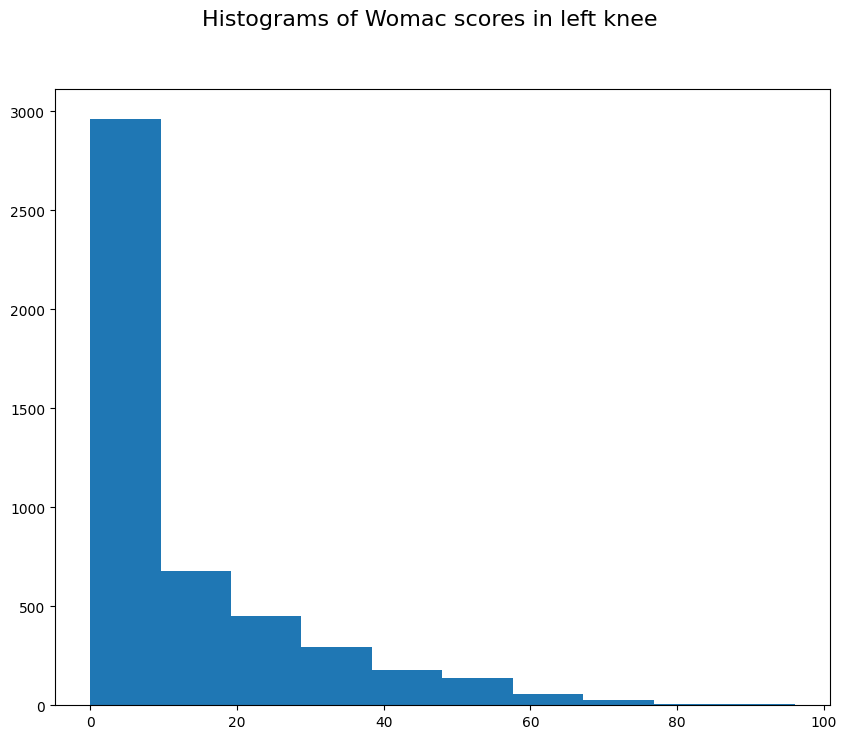

In [15]:
womac_left_knee = data['V00WOMTSL']
womac_left_knee.hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in left knee', fontsize=16)
plt.show()

In [16]:
from src.dataLoaders.NiftiDataLoader2 import NiftiDataLoader
importlib.reload(sys.modules['src.dataLoaders.NiftiDataLoader2'])

<module 'src.dataLoaders.NiftiDataLoader2' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/NiftiDataLoader2.py'>

In [17]:
def sample_uniformly(df, feature, n_samples):
    """
    Sample n_samples rows uniformly distributed according to the specified feature.

    Parameters:
    - df: pandas DataFrame
    - feature: str, the name of the feature to sample uniformly
    - n_samples: int, total number of samples desired

    Returns:
    - pandas DataFrame containing the sampled rows
    """
    unique_values = df[feature].unique()
    n_unique_values = len(unique_values)

    # Calculate number of samples per unique value
    samples_per_value = max(1, n_samples // n_unique_values)

    sampled_df_list = []
    for value in unique_values:
        value_group = df[df[feature] == value]
        sampled_value_group = value_group.sample(n=min(samples_per_value, len(value_group)), replace=False)
        sampled_df_list.append(sampled_value_group)

    sampled_df = pd.concat(sampled_df_list).sample(n=n_samples, replace=False).reset_index(drop=True)
    return sampled_df


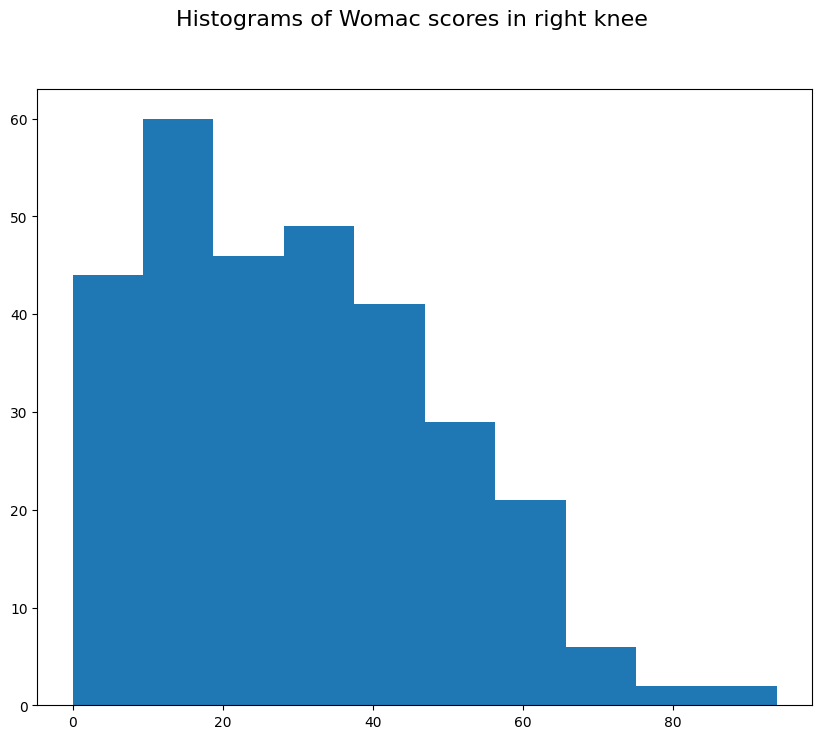

In [18]:
womac_right_knee_uni = sample_uniformly(data, 'V00WOMTSR', 300)
womac_right_knee_uni['V00WOMTSR'].hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in right knee', fontsize=16)
plt.show()

In [19]:
data.shape

(4796, 170)